In [318]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données à partir du CSV

data = pd.read_csv('export_finwhale_northMed.csv')






/tmp/ipykernel_31422/561792700.py:7: DtypeWarning: Columns (10,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('export_finwhale_northMed.csv')


In [319]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92732 entries, 0 to 92731
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OBJECTID         92732 non-null  int64  
 1   dataset_id       92732 non-null  int64  
 2   row_id           92732 non-null  object 
 3   latitude         92732 non-null  float64
 4   longitude        92732 non-null  float64
 5   species_name     92732 non-null  object 
 6   scientific_name  92732 non-null  object 
 7   common_name      92732 non-null  object 
 8   itis_tsn         92732 non-null  int64  
 9   group_size       83373 non-null  float64
 10  series_id        382 non-null    object 
 11  date_time        92732 non-null  object 
 12  timezone         8941 non-null   float64
 13  ds_type          92732 non-null  object 
 14  platform         92732 non-null  object 
 15  provider         92728 non-null  object 
 16  lprecision       92730 non-null  float64
 17  tprecision  

In [320]:
# Liste des colonnes à supprimer
columns_to_drop = ['scientific_name', 'common_name', 'species_name', 'group_size', 'itis_tsn',
                   'last_mod', 'notes', 'lprecision', 'tprecision', 'ds_type', 'platform',
                   'provider', 'series_id', 'timezone', 'dataset_id', 'oceano', 'row_id','season']

# Supprimer les colonnes du DataFrame 'data'
data = data.drop(columns=columns_to_drop, axis=1)

# Afficher le DataFrame après suppression des colonnes
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92732 entries, 0 to 92731
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OBJECTID   92732 non-null  int64  
 1   latitude   92732 non-null  float64
 2   longitude  92732 non-null  float64
 3   date_time  92732 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 2.8+ MB
None


# Label encoding

# creation de la colonne position

In [321]:
# Créer la colonne 'position' avec 4 décimales après la virgule
data['position'] = data.apply(lambda row: f"{row['latitude']:.4f}_{row['longitude']:.4f}", axis=1)

# Afficher le DataFrame avec la nouvelle colonne 'position'
print(data[['latitude', 'longitude', 'position']].head())


    latitude  longitude          position
0  40.950000 -71.633333  40.9500_-71.6333
1  40.833333 -71.816667  40.8333_-71.8167
2  40.883333 -71.683333  40.8833_-71.6833
3  41.000000 -71.616667  41.0000_-71.6167
4  41.016667 -71.416667  41.0167_-71.4167


In [322]:
#supprime les colonne qui sont remplacer pas 'position' desormais
data = data.drop(['latitude','longitude'], axis=1)

In [323]:
# Afficher le DataFrame après suppression des colonnes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92732 entries, 0 to 92731
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   OBJECTID   92732 non-null  int64 
 1   date_time  92732 non-null  object
 2   position   92732 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.1+ MB
None


In [324]:
"""import pandas as pd
import matplotlib.pyplot as plt


# Convertir la colonne 'date_time' en format datetime
data['date_time'] = pd.to_datetime(data['date_time'])

# Créer une nouvelle colonne avec la date au jour près
data['date_day'] = data['date_time'].dt.date

# Grouper par date et compter le nombre d'observations
observations_by_day = data.groupby('date_day').size().reset_index(name='count')

# Tracer le graphique
plt.figure(figsize=(12, 6))
plt.plot(observations_by_day['date_day'], observations_by_day['count'], marker='o')
plt.title('Nombre d\'observations au fil du temps')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations')
plt.show()
"""

"import pandas as pd\nimport matplotlib.pyplot as plt\n\n\n# Convertir la colonne 'date_time' en format datetime\ndata['date_time'] = pd.to_datetime(data['date_time'])\n\n# Créer une nouvelle colonne avec la date au jour près\ndata['date_day'] = data['date_time'].dt.date\n\n# Grouper par date et compter le nombre d'observations\nobservations_by_day = data.groupby('date_day').size().reset_index(name='count')\n\n# Tracer le graphique\nplt.figure(figsize=(12, 6))\nplt.plot(observations_by_day['date_day'], observations_by_day['count'], marker='o')\nplt.title('Nombre d'observations au fil du temps')\nplt.xlabel('Date')\nplt.ylabel('Nombre d'observations')\nplt.show()\n"

In [325]:
# Afficher les premières lignes du DataFrame
print(data.head())

   OBJECTID            date_time          position
0         1  1981/05/02 12:35:00  40.9500_-71.6333
1         2  1981/06/27 12:05:00  40.8333_-71.8167
2         3  1982/08/02 11:05:00  40.8833_-71.6833
3         4  1989/06/19 12:33:00  41.0000_-71.6167
4         5  1989/06/22 12:36:00  41.0167_-71.4167


# CNN

Epoch 1/10
66186/66186 - 96s - loss: 2.2141e-04 - 96s/epoch - 1ms/step
Epoch 2/10
66186/66186 - 95s - loss: 2.1254e-04 - 95s/epoch - 1ms/step
Epoch 3/10
66186/66186 - 93s - loss: 2.0436e-04 - 93s/epoch - 1ms/step
Epoch 4/10
66186/66186 - 93s - loss: 2.1025e-04 - 93s/epoch - 1ms/step
Epoch 5/10
66186/66186 - 93s - loss: 2.0795e-04 - 93s/epoch - 1ms/step
Epoch 6/10
66186/66186 - 96s - loss: 2.0251e-04 - 96s/epoch - 1ms/step
Epoch 7/10
66186/66186 - 93s - loss: 1.9678e-04 - 93s/epoch - 1ms/step
Epoch 8/10
66186/66186 - 93s - loss: 1.9655e-04 - 93s/epoch - 1ms/step
Epoch 9/10
66186/66186 - 93s - loss: 1.9176e-04 - 93s/epoch - 1ms/step
Epoch 10/10
66186/66186 - 91s - loss: 1.9265e-04 - 91s/epoch - 1ms/step
215/215 [==============================] - 0s 1ms/step


ValueError: x and y must have same first dimension, but have shapes (6866,) and (6856, 1)

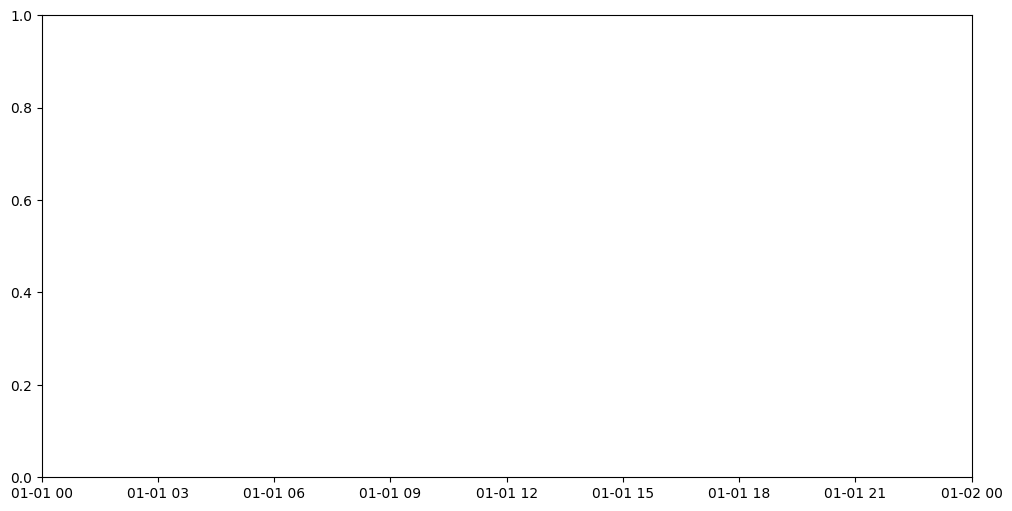

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Charger les données (remplacez cela par votre façon de charger les données)
# data = pd.read_csv('votre_fichier.csv')
data['date_time'] = pd.to_datetime(data['date_time'])

# Extraire l'année de la colonne 'date_time'
data['year'] = data['date_time'].dt.year

# Diviser les données en ensembles d'entraînement (2012-2016) et de test (2017-2018)
train_data = data[data['year'] <= 2016]
test_data = data[(data['year'] >= 2017) & (data['year'] <= 2018)]

# Grouper par date et compter le nombre d'observations dans l'ensemble d'entraînement
observations_by_day_train = train_data.groupby('date_time').size().reset_index(name='count')

# Normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(observations_by_day_train['count'].values.reshape(-1, 1))

# Fonction pour créer les séquences temporelles
def create_sequences(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Créer les séquences temporelles avec une fenêtre de look_back
look_back = 10
trainX, trainY = create_sequences(scaled_train_data, look_back)

# Remodeler les données pour l'entrée dans le modèle LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

# Créer le modèle LSTM
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, look_back)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# Grouper par date et compter le nombre d'observations dans l'ensemble de test
observations_by_day_test = test_data.groupby('date_time').size().reset_index(name='count')

# Normaliser les données de test
scaled_test_data = scaler.transform(observations_by_day_test['count'].values.reshape(-1, 1))

# Créer les séquences temporelles pour les données de test
testX, testY = create_sequences(scaled_test_data, look_back)

# Remodeler les données pour l'entrée dans le modèle LSTM
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Faire des prédictions sur les données de test
test_predictions = model.predict(testX)

# Inverser la normalisation pour obtenir les prédictions réelles
test_predictions = scaler.inverse_transform(test_predictions)





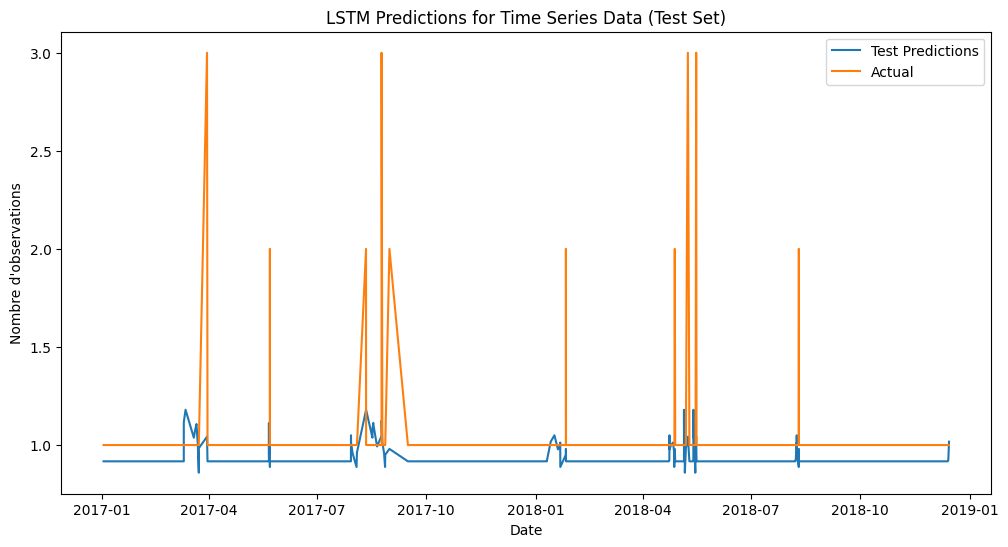

In [328]:

# Visualiser les résultats
plt.figure(figsize=(12, 6))
plt.plot(observations_by_day_test['date_time'][:len(test_predictions)], test_predictions, label='Test Predictions')
plt.plot(observations_by_day_test['date_time'][:len(test_predictions)], observations_by_day_test['count'][:len(test_predictions)], label='Actual')
plt.title('LSTM Predictions for Time Series Data (Test Set)')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations')
plt.legend()
plt.show()

# XGBOOST

Mean Squared Error on Test Set: 0.004014908464441032


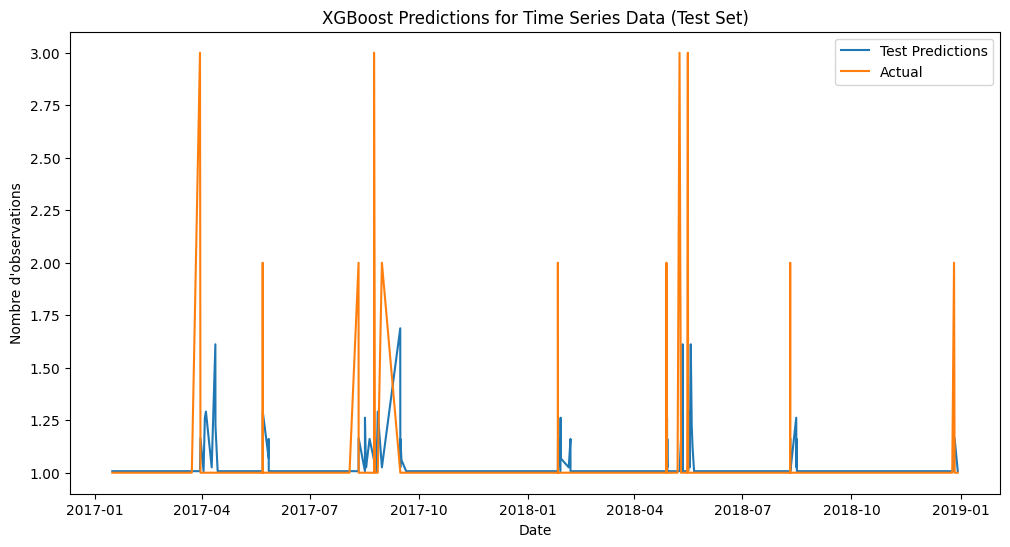

In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Charger les données (remplacez cela par votre façon de charger les données)
# data = pd.read_csv('votre_fichier.csv')
data['date_time'] = pd.to_datetime(data['date_time'])

# Extraire l'année de la colonne 'date_time'
data['year'] = data['date_time'].dt.year

# Diviser les données en ensembles d'entraînement (2012-2016) et de test (2017-2018)
train_data = data[(data['year'] >= 2012) & (data['year'] <= 2016)]
test_data = data[(data['year'] >= 2017) & (data['year'] <= 2018)]

# Grouper par date et compter le nombre d'observations dans l'ensemble d'entraînement
observations_by_day_train = train_data.groupby('date_time').size().reset_index(name='count')

# Normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(observations_by_day_train['count'].values.reshape(-1, 1))

# Fonction pour créer les séquences temporelles
def create_sequences(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Créer les séquences temporelles avec une fenêtre de look_back
look_back = 10
trainX, trainY = create_sequences(scaled_train_data, look_back)

# Créer le modèle XGBoost
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)

# Entraîner le modèle
model.fit(trainX, trainY)

# Grouper par date et compter le nombre d'observations dans l'ensemble de test
observations_by_day_test = test_data.groupby('date_time').size().reset_index(name='count')

# Normaliser les données de test
scaled_test_data = scaler.transform(observations_by_day_test['count'].values.reshape(-1, 1))

# Créer les séquences temporelles pour les données de test
testX, testY = create_sequences(scaled_test_data, look_back)

# Faire des prédictions sur les données de test
test_predictions = model.predict(testX)

# Inverser la normalisation pour obtenir les prédictions réelles
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

# Calculer et afficher l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(observations_by_day_test['count'][look_back:], test_predictions)
print(f"Mean Squared Error on Test Set: {mse}")

# Visualiser les résultats
plt.figure(figsize=(12, 6))
plt.plot(observations_by_day_test['date_time'][look_back:], test_predictions, label='Test Predictions')
plt.plot(observations_by_day_test['date_time'][look_back:], observations_by_day_test['count'][look_back:], label='Actual')
plt.title('XGBoost Predictions for Time Series Data (Test Set)')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# Grouper par date et compter le nombre d'observations
observations_by_day = data.groupby(data.index.date).size().reset_index(name='count')

# Diviser les données en ensembles d'entraînement et de test
train_data = observations_by_day['2012-01-01':'2016-12-31']
test_data = observations_by_day['2017-01-01':'2018-12-31']

# Entraîner un modèle (Random Forest Regressor par exemple)
model = RandomForestRegressor()
model.fit(train_data.index.values.reshape(-1, 1), train_data['count'])

# Faire des prédictions
train_predictions = model.predict(train_data.index.values.reshape(-1, 1))
test_predictions = model.predict(test_data.index.values.reshape(-1, 1))

# Calculer les erreurs
mse_train = mean_squared_error(train_data['count'], train_predictions)
mse_test = mean_squared_error(test_data['count'], test_predictions)

# Visualiser les résultats
plt.figure(figsize=(12, 6))
plt.plot(observations_by_day['date'], observations_by_day['count'], label='Actual')
plt.plot(train_data['date'], train_predictions, label='Train Predictions')
plt.plot(test_data['date'], test_predictions, label='Test Predictions')
plt.title('Prédictions du nombre d\'observations par date')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations')
plt.legend()
plt.show()

print(f"Mean Squared Error on Train Set: {mse_train}")
print(f"Mean Squared Error on Test Set: {mse_test}")


TypeError: cannot do slice indexing on RangeIndex with these indexers [2012-01-01] of type str

# CNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Charger les données (assurez-vous que 'date_time' est déjà converti en format datetime et utilisé comme index)
# data = ...

# Extraire l'année de la colonne 'date_time'
data['year'] = data.index.year

# Diviser les données en ensembles d'entraînement (2012-2016) et de test (2017-2018)
train_data = data[data['year'] <= 2016]
test_data = data[(data['year'] >= 2017) & (data['year'] <= 2018)]

# Grouper par date et compter le nombre d'observations dans l'ensemble d'entraînement
observations_by_day_train = train_data.groupby('date_time').size().reset_index(name='count')

# Normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(observations_by_day_train['count'].values.reshape(-1, 1))

# Fonction pour créer les séquences temporelles
def create_sequences(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Créer les séquences temporelles avec une fenêtre de look_back
look_back = 10
trainX, trainY = create_sequences(scaled_train_data, look_back)

# Remodeler les données pour l'entrée dans le modèle LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

# Créer le modèle LSTM
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, look_back)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# Grouper par date et compter le nombre d'observations dans l'ensemble de test
observations_by_day_test = test_data.groupby('date_time').size().reset_index(name='count')

# Normaliser les données de test
scaled_test_data = scaler.transform(observations_by_day_test['count'].values.reshape(-1, 1))

# Créer les séquences temporelles pour les données de test
testX, testY = create_sequences(scaled_test_data, look_back)

# Remodeler les données pour l'entrée dans le modèle LSTM
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Faire des prédictions sur les données de test
test_predictions = model.predict(testX)

# Inverser la normalisation pour obtenir les prédictions réelles
test_predictions = scaler.inverse_transform(test_predictions)

# Visualiser les résultats
plt.figure(figsize=(12, 6))
plt.plot(observations_by_day_test['date_time'], test_predictions, label='Test Predictions')
plt.plot(observations_by_day_test['date_time'], observations_by_day_test['count'], label='Actual')
plt.title('LSTM Predictions for Time Series Data (Test Set)')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations')
plt.legend()
plt.show()


KeyError: 'date_time'

/home/apryale/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:542: RuntimeWarning: overflow encountered in divide
  X /= self.scale_
/home/apryale/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:542: RuntimeWarning: overflow encountered in divide
  X /= self.scale_


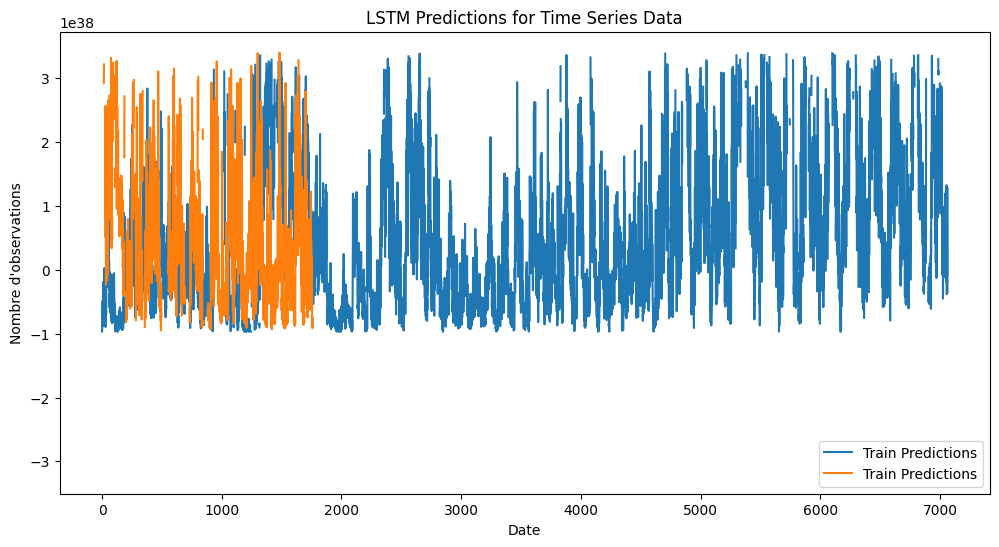

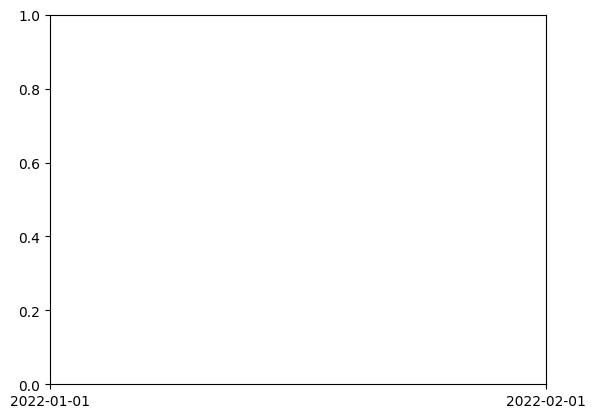

In [ ]:
# Inverser la normalisation pour obtenir les prédictions réelles
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Inverser la normalisation des données d'observation également
actual_values = scaler.inverse_transform(scaled_data)

# Visualiser les résultats
plt.figure(figsize=(12, 6))
plt.plot( train_predict, label='Train Predictions')
plt.plot( test_predict, label='Train Predictions')
plt.title('LSTM Predictions for Time Series Data')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations')
plt.legend()
plt.show()

# Définir les limites de l'axe des x pour zoomer
start_date = '2022-01-01'
end_date = '2022-02-01'
plt.xlim(start_date, end_date)

plt.show()


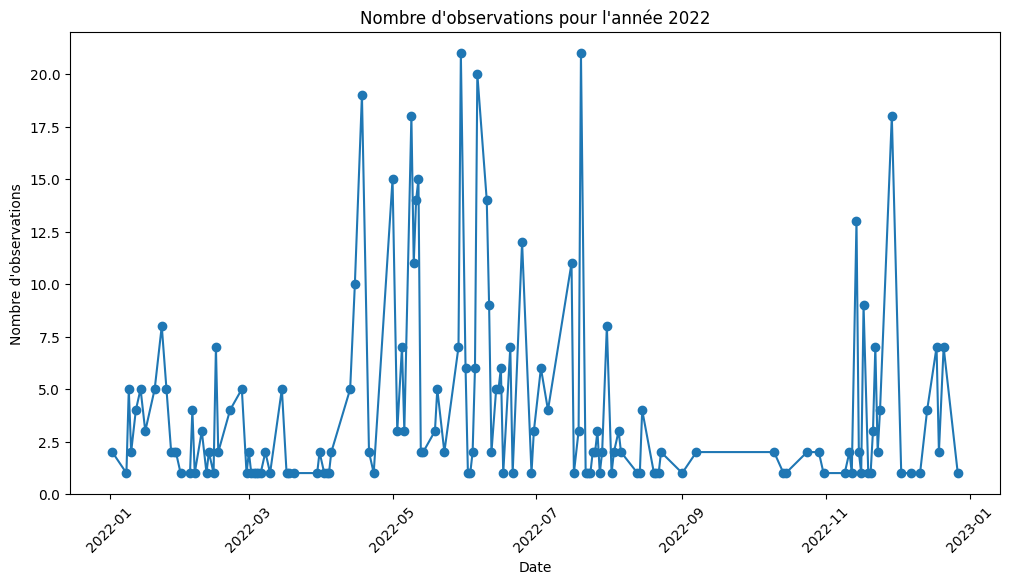

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt






# Filtrer les données pour inclure uniquement l'année 2022
selected_year_data = observations_by_day[observations_by_day['date_day'].apply(lambda x: x.year == 2022)]

# Tracer le graphique
plt.figure(figsize=(12, 6))
plt.plot(selected_year_data['date_day'], selected_year_data['count'], marker='o')
plt.title('Nombre d\'observations pour l\'année 2022')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations')
plt.xticks(rotation=45)
plt.show()


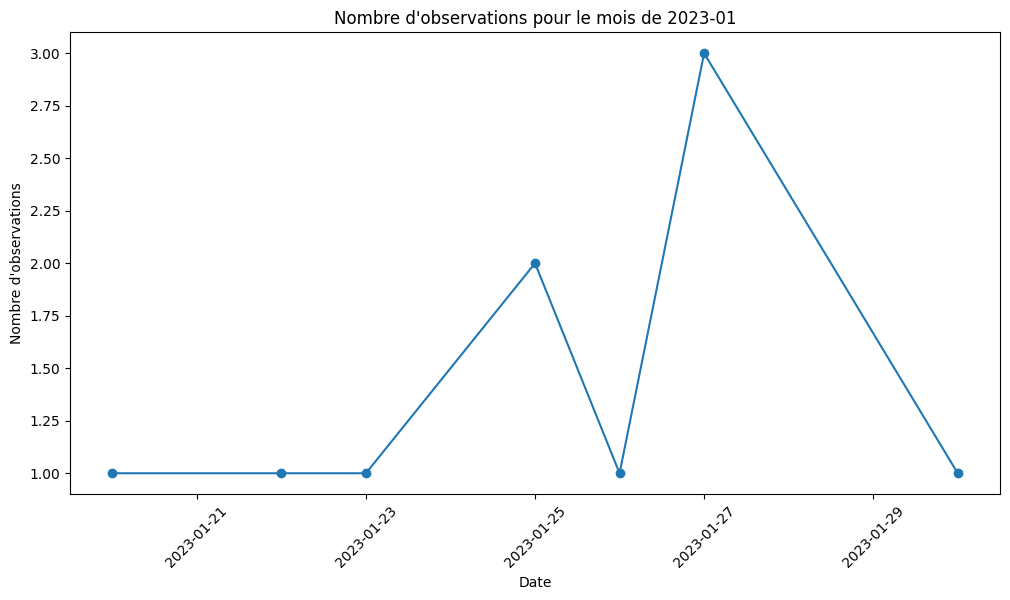

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt






# Sélectionner le mois que vous souhaitez afficher (par exemple, janvier)
selected_month = '2023-01'

# Filtrer les données pour inclure uniquement le mois sélectionné
selected_month_data = observations_by_day[observations_by_day['date_day'].apply(lambda x: str(x).startswith(selected_month))]

# Tracer le graphique
plt.figure(figsize=(12, 6))
plt.plot(selected_month_data['date_day'], selected_month_data['count'], marker='o')
plt.title(f'Nombre d\'observations pour le mois de {selected_month}')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing



In [ ]:

# Grouper par date et compter le nombre d'observations
observations_by_day = data.groupby('date_day').size().reset_index(name='count')
# Convertir l'index en type datetime
observations_by_day.index = pd.to_datetime(observations_by_day.index)

# Séparer les données d'entraînement et de test
train_data = observations_by_day['2010':'2017']
test_data = observations_by_day['2018':'2019']


In [ ]:
model = ExponentialSmoothing(train_data['count'], trend='add', seasonal='add', seasonal_periods=365)


# Entraîner le modèle
results = model.fit()

# Prédictions pour les données de test
predicted_values = results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)


/home/apryale/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

In [ ]:
# Visualiser les prédictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.values, label='Train')
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predicted_values, label='Predicted', color='red')
plt.title('Observations et Prédictions avec Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations')
plt.legend()
plt.grid(True)
plt.show()

......




.......

In [ ]:

# Séparer les données d'entraînement et de test
train_data = observations_by_day['2010':'2017']
test_data = observations_by_day['2018':'2019']

# Créer le modèle SARIMA
order = (1, 1, 1)  # Paramètres ARIMA
seasonal_order = (1, 1, 1, 12)  # Paramètres saisonniers
model = sm.tsa.SARIMAX(train_data['count'], order=order, seasonal_order=seasonal_order)



/home/apryale/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/apryale/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
results = model.fit(start_params=None, method='powell', maxiter=100, full_output=True, disp=1, skip_hessian=False, options={'ftol': 1e-8})


TypeError: statsmodels.base.model.LikelihoodModel.fit() got multiple values for keyword argument 'skip_hessian'

In [ ]:
# Visualiser les prédictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.values, label='Train')
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predicted_values, label='Predicted', color='red')
plt.title('Observations et Prédictions')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
"""# Convertir l'index en type datetime
observations_by_day.index = pd.to_datetime(observations_by_day.index)

# Séparer les données d'entraînement et de test
train_data = observations_by_day['2010':'2017']
test_data = observations_by_day['2018':'2019']

# Créer le modèle SARIMA
order = (1, 1, 1)  # Paramètres ARIMA
seasonal_order = (1, 1, 1, 12)  # Paramètres saisonniers
model = sm.tsa.SARIMAX(train_data['count'], order=order, seasonal_order=seasonal_order, solver='powell')

"""

/home/apryale/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/apryale/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/apryale/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['solver']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


# Modèle Arima

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt










In [ ]:
# Charger les données et spécifier le type des colonnes avec mixed types
data = pd.read_csv('export_finwhale_northMed.csv', parse_dates=True, index_col='date_time')

# Trier l'index de manière monotone
data = data.sort_index()

# Créer une nouvelle colonne avec la date au jour près
data['date_day'] = data.index.date

# Séparer les données d'entraînement et de test
train_data = data['2010':'2017']
test_data = data['2018':'2019']



/tmp/ipykernel_31422/4190319783.py:2: DtypeWarning: Columns (10,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('export_finwhale_northMed.csv', parse_dates=True, index_col='date_time')


In [ ]:
# Créer le modèle SARIMA (Seasonal AutoRegressive Integrated Moving Average)
model = sm.tsa.SARIMAX(train_data['OBJECTID'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Entraîner le modèle
results = model.fit()



/home/apryale/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/apryale/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05522D+01    |proj g|=  7.73685D-02


 This problem is unconstrained.



At iterate    5    f=  1.05002D+01    |proj g|=  2.23260D-02

At iterate   10    f=  1.04901D+01    |proj g|=  4.90674D-03

At iterate   15    f=  1.04891D+01    |proj g|=  3.21750D-03

At iterate   20    f=  1.04888D+01    |proj g|=  1.06784D-03

At iterate   25    f=  1.04888D+01    |proj g|=  2.17482D-04

At iterate   30    f=  1.04887D+01    |proj g|=  7.72386D-03

At iterate   35    f=  1.04758D+01    |proj g|=  3.07921D-02

At iterate   40    f=  1.03959D+01    |proj g|=  5.58395D-02

At iterate   45    f=  1.03765D+01    |proj g|=  1.06455D-02

At iterate   50    f=  1.03758D+01    |proj g|=  1.37192D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/apryale/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


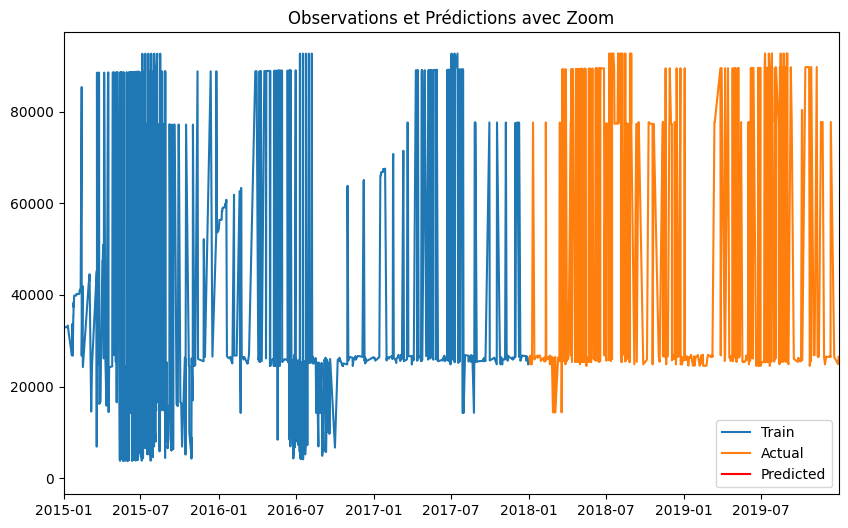

In [ ]:
# Convertir les chaînes de date en objets datetime
start_date = pd.to_datetime('2015-01-01')
end_date = pd.to_datetime('2019-12-31')

# Visualiser les prédictions avec zoom
plt.figure(figsize=(10, 6))
plt.plot(train_data['OBJECTID'], label='Train')
plt.plot(test_data['OBJECTID'], label='Actual')
plt.plot(predicted_values, label='Predicted', color='red')
plt.title('Observations et Prédictions avec Zoom')
plt.legend()

# Définir les limites de l'axe des x pour le zoom
plt.xlim(start_date, end_date)

plt.show()


In [ ]:
# Calculer l'erreur quadratique moyenne (MSE)
# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(test_data['OBJECTID'], predicted_values)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 1971018575.0512047


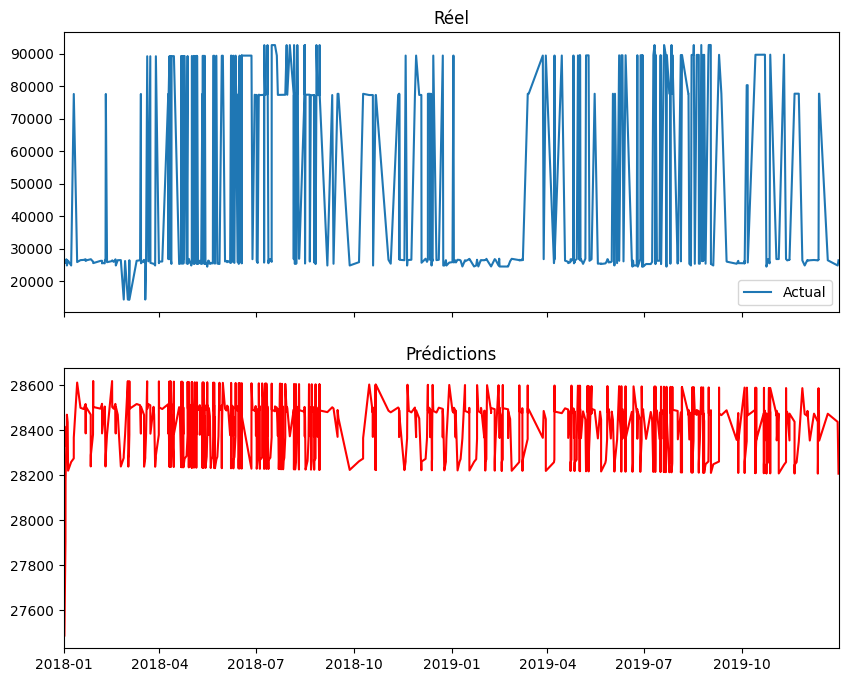

In [ ]:
# Convertir les chaînes de date en objets datetime
start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2019-12-31')

# Créer une figure avec deux sous-graphiques
fig, ax = plt.subplots(figsize=(10, 8), nrows=2, sharex=True)

# Sous-graphique du bas (graphique de prédiction)
ax[1].plot(test_data.index, predicted_values, label='Predicted', color='red')
ax[1].set_title('Prédictions')

# Sous-graphique du haut (graphique réel)
ax[0].plot(test_data.index, test_data['OBJECTID'], label='Actual')
ax[0].set_title('Réel')

# Définir les limites de l'axe des x pour le zoom
plt.xlim(start_date, end_date)

# Ajouter une légende au sous-graphique du haut
ax[0].legend()

plt.show()